## Basic Classical Generative Adversarial Networks 
Reference: https://realpython.com/generative-adversarial-networks/#discriminative-vs-generative-models

<img src="../../assets/Classical%20GAN.png" width="auto" height="500" alt="Alt text">

In [12]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [13]:
# Set the seed for reproducibility
torch.manual_seed(111)

# Prepare data

In [14]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

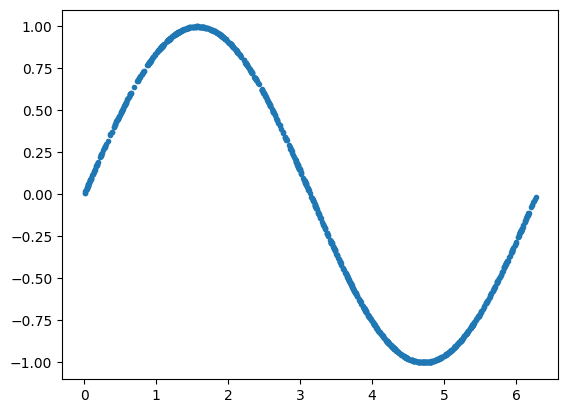

In [15]:
# Prepare the data
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [16]:
# Create train loader
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

# Create discriminator and generator

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output
    
discriminator = Discriminator()

In [18]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

# Training module

In [19]:
# Set up
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [20]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [21]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308740973472595
Epoch: 0 Loss G.: 1.7989581823349
Epoch: 10 Loss D.: 0.6099680662155151
Epoch: 10 Loss G.: 0.9077385067939758
Epoch: 20 Loss D.: 0.6200631260871887
Epoch: 20 Loss G.: 0.953209638595581
Epoch: 30 Loss D.: 0.611523449420929
Epoch: 30 Loss G.: 0.9587339758872986
Epoch: 40 Loss D.: 0.6862791776657104
Epoch: 40 Loss G.: 1.0068551301956177
Epoch: 50 Loss D.: 0.6572889089584351
Epoch: 50 Loss G.: 0.7889376282691956
Epoch: 60 Loss D.: 0.6758030652999878
Epoch: 60 Loss G.: 0.8458390235900879
Epoch: 70 Loss D.: 0.71137535572052
Epoch: 70 Loss G.: 0.6257340312004089
Epoch: 80 Loss D.: 0.6752761602401733
Epoch: 80 Loss G.: 0.7071601152420044
Epoch: 90 Loss D.: 0.6999450325965881
Epoch: 90 Loss G.: 0.7189481258392334
Epoch: 100 Loss D.: 0.6843206882476807
Epoch: 100 Loss G.: 0.7307493090629578
Epoch: 110 Loss D.: 0.6279256939888
Epoch: 110 Loss G.: 1.0432333946228027
Epoch: 120 Loss D.: 0.6868332028388977
Epoch: 120 Loss G.: 0.7289265990257263
Epoch: 130 Loss D

# Post processing and plotting

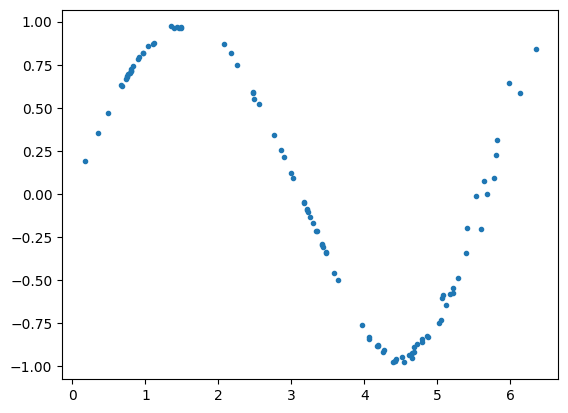

In [22]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")